In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = './train'

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (299, 299),
    batch_size = 20,
    class_mode = 'categorical'
)

test_dir = './test'
test_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (299, 299),
    batch_size = 20,
    class_mode = 'categorical'
)

Found 2824 images belonging to 5 classes.
Found 846 images belonging to 5 classes.


In [7]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras import backend as K

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape = (299, 299, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(5, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics = ['acc'])

history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 10)

for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True

from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics = ['acc'])

history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 10, 
                              validation_data = validation_generator, validation_steps = 50)

Epoch 1/10
100/100 [==============================] - 184s 2s/step - loss: 2.5540 - acc: 0.4842
Epoch 2/10
100/100 [==============================] - 184s 2s/step - loss: 0.7519 - acc: 0.7415
Epoch 3/10
100/100 [==============================] - 183s 2s/step - loss: 0.6669 - acc: 0.7579
Epoch 4/10
100/100 [==============================] - 186s 2s/step - loss: 0.5480 - acc: 0.8057
Epoch 5/10
100/100 [==============================] - 195s 2s/step - loss: 0.4903 - acc: 0.8345
Epoch 6/10
100/100 [==============================] - 194s 2s/step - loss: 0.5304 - acc: 0.8122
Epoch 7/10
100/100 [==============================] - 179s 2s/step - loss: 0.5014 - acc: 0.8236
Epoch 8/10
100/100 [==============================] - 180s 2s/step - loss: 0.4627 - acc: 0.8472
Epoch 9/10
100/100 [==============================] - 179s 2s/step - loss: 0.4839 - acc: 0.8544
Epoch 10/10
100/100 [==============================] - 181s 2s/step - loss: 0.4914 - acc: 0.8410
Epoch 1/10
100/100 [===================

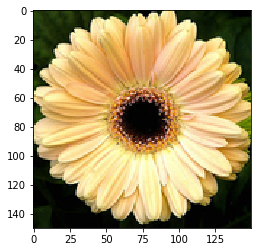

(1, 150, 150, 3)


array([[1.000000e+00, 6.170058e-18, 0.000000e+00, 0.000000e+00,
        9.410201e-38]], dtype=float32)

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline
 
image=Image.open('./train/daisy/107592979_aaa9cdfe78_m.jpg')
image = image.resize((150, 150),Image.ANTIALIAS)
plt.imshow(image)
plt.show()
image=np.copy(image)
image = image.reshape((1, 150,150, 3))
print(image.shape)
# print(image)
model.predict(image)